In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv('vejce.csv')

In [3]:
print(data.head())

   CSU_ID               ITEM_NAME  YEAR  MONTH  CSU_AVG_PRICE  \
0  114701  Vejce slepičí čerstvá   2020      1          30.92   
1  114701  Vejce slepičí čerstvá   2020      2          29.77   
2  114701  Vejce slepičí čerstvá   2020      3          29.64   
3  114701  Vejce slepičí čerstvá   2020      4          28.66   
4  114701  Vejce slepičí čerstvá   2020      5          30.14   

   ROHLIK_AVG_PRICE  KOSIK_AVG_PRICE  ITESCO_AVG_PRICE  ROHLIK_DIFF_FROM_CSU  \
0         64.490627        77.052381         40.609677            -33.570627   
1         64.223626        77.688494         37.300000            -34.453626   
2         62.465196        82.145528         36.848387            -32.825196   
3         58.052775        84.659259         37.053333            -29.392775   
4         59.433883        77.701673         37.016129            -29.293883   

   KOSIK_DIFF_FROM_CSU  ITESCO_DIFF_FROM_CSU  ROHLIK_MIN_PRICE  \
0           -46.132381             -9.689677              25.0

In [4]:
data = data[['YEAR', 'MONTH', 'ITESCO_AVG_PRICE']]

In [5]:
print(data.head())

   YEAR  MONTH  ITESCO_AVG_PRICE
0  2020      1         40.609677
1  2020      2         37.300000
2  2020      3         36.848387
3  2020      4         37.053333
4  2020      5         37.016129


In [6]:
data['YEAR_MONTH'] = data.YEAR.astype(str) + '/' + data.MONTH.astype(str)

In [7]:
print(data.head())

   YEAR  MONTH  ITESCO_AVG_PRICE YEAR_MONTH
0  2020      1         40.609677     2020/1
1  2020      2         37.300000     2020/2
2  2020      3         36.848387     2020/3
3  2020      4         37.053333     2020/4
4  2020      5         37.016129     2020/5


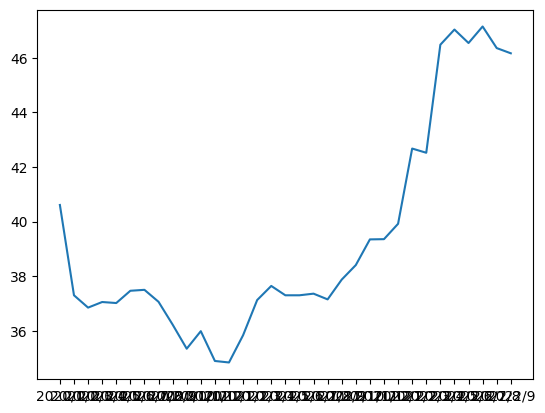

In [8]:
plt.plot(data['YEAR_MONTH'], data['ITESCO_AVG_PRICE'])
plt.show()

In [9]:
from sklearn import linear_model
X_train = data[['YEAR', 'MONTH']]
y_train = data[['ITESCO_AVG_PRICE']]

In [10]:
# Define the model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [11]:
# Generate forecast
d = {'YEAR': [2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023], 'MONTH': pd.Series([10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])}
X_val = pd.DataFrame(data=d, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [12]:
# Generate forecast
y_val = linear_regression.predict(X_val)

In [13]:
X_val['ITESCO_AVG_PRICE'] = y_val

In [14]:
X_val['YEAR_MONTH'] = X_val.YEAR.astype(str) + '/' + X_val.MONTH.astype(str)

In [15]:
print(X_val.head())

   YEAR  MONTH  ITESCO_AVG_PRICE YEAR_MONTH
0  2022     10         43.862399    2022/10
1  2022     11         43.937666    2022/11
2  2022     12         44.012933    2022/12
3  2023      1         47.075365     2023/1
4  2023      2         47.150633     2023/2


In [16]:
df = pd.concat([data, X_val])
df.tail(20)

,YEAR,MONTH,ITESCO_AVG_PRICE,YEAR_MONTH
28,2022,5,47.037097,2022/5
29,2022,6,46.544068,2022/6
30,2022,7,47.150000,2022/7
31,2022,8,46.358333,2022/8
32,2022,9,46.167176,2022/9
0,2022,10,43.862399,2022/10
1,2022,11,43.937666,2022/11
2,2022,12,44.012933,2022/12
3,2023,1,47.075365,2023/1
4,2023,2,47.150633,2023/2


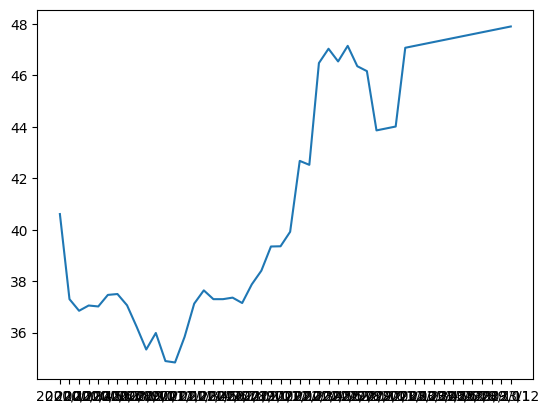

In [18]:
plt.plot(df['YEAR_MONTH'], df['ITESCO_AVG_PRICE'])
plt.show()